# Formula 1 - Visualisation


### Import Relevant Libraries

In [1]:
import pandas as pd
import numpy as np

In [2]:
import requests
import bs4
from bs4 import BeautifulSoup
import time
from tqdm import tqdm
import math

In [3]:
from collections import defaultdict
import regex as re
import datetime

# Load The Data

In [4]:
merged = pd.read_csv('./CSV/merged_database.csv').drop(['Unnamed: 0'], axis=1)

In [5]:
main_df = pd.read_csv('./CSV/main_df.csv').drop(['Unnamed: 0'], axis=1)

In [6]:
age_points = pd.read_csv('./CSV/age_points.csv').drop(['Unnamed: 0'], axis=1)

# Visualization

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

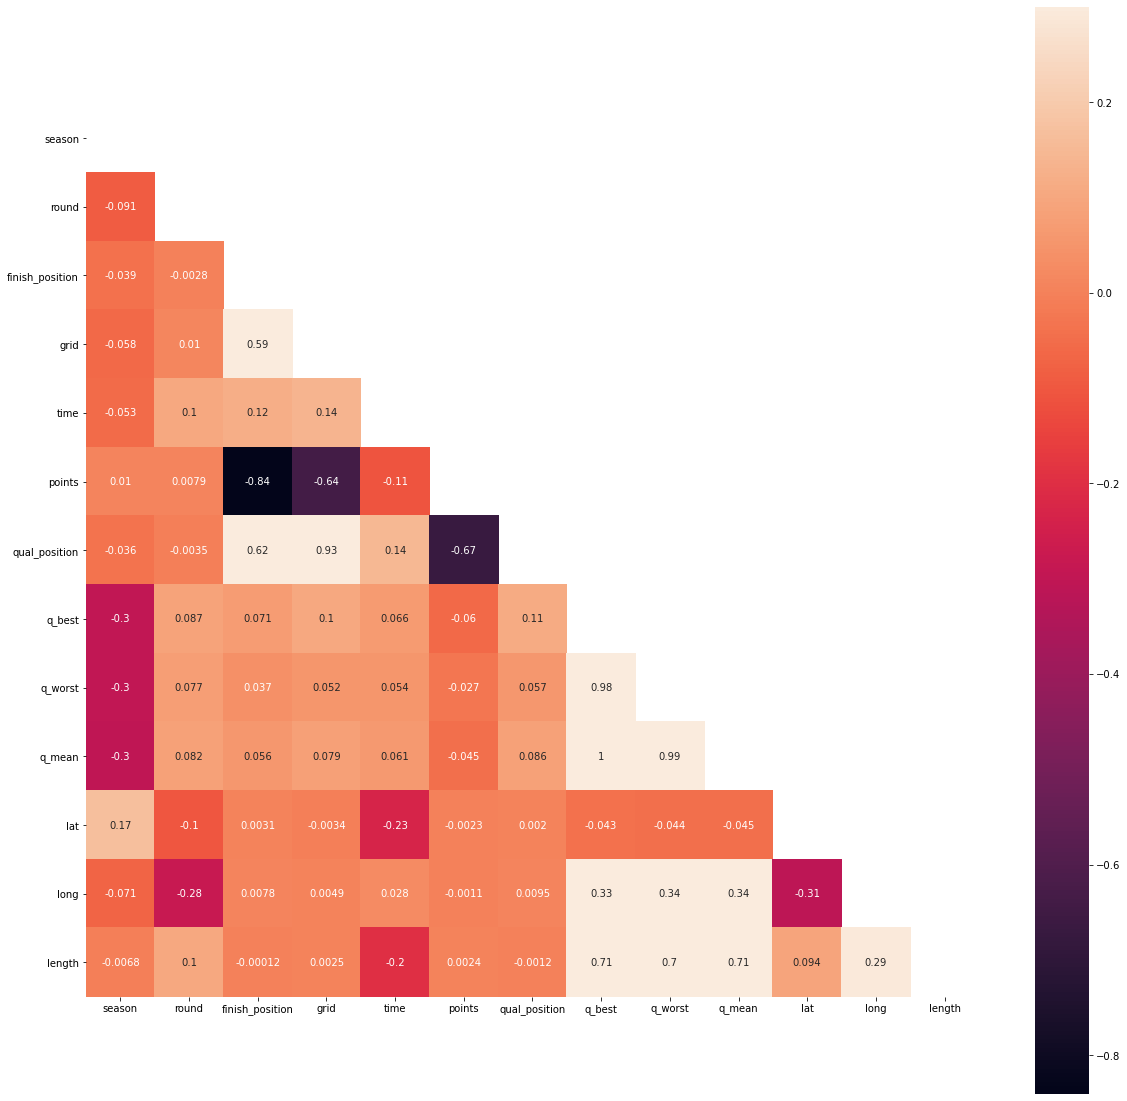

In [8]:
plt.subplots(figsize=(20,20))
corr = merged.corr()#.abs()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(corr, mask=mask, vmax=.3, square=True, annot=True)
# with sns.axes_style("white"):
#     f, ax = plt.subplots(figsize=(7, 5))
#     ax = 
plt.show()

As can be seen above, there is little correlation amongst the variables bar those which are closely related in some way, for example the **Q_best**, **Q_mean** & **Q_worst** qualifying times and the **Qualifying**, **Grid** and **Finish positions**. Curiously, of **Qualifying Position** and **Grid Position**, it is **Qualifying Position** that is more closely related to the **Finish Position**. The difference here is that **Grid Position** is essentially the same as **Qualifying Positions** in most cases, bar those where certain drivers have received a grid-place penalty or are unable to start the race for any reason, whereby they will drop down the grid and other drivers will move up.
This hints at some reliability and predictability with drivers and machinery, showing that those drivers who are strong qualifiers will likely be able to claim back a position that better resembles their speed in comparison with other drivers.
Another interesting non-correlation is that of the **Q_best**, **Q_mean** & **Q_worst** and the **Qualifying Position**. Of course, this is likely down to the fact that each track is a different length and can maintain a different average speed throughout the lap. Therefore, across the full dataset of all tracks and all lap times, it is reasonable to say that there is little correlation, although circuit by circuit there would definitely be a high correlation between these variables (although it would be very unlikely these would be 100% correlated.)

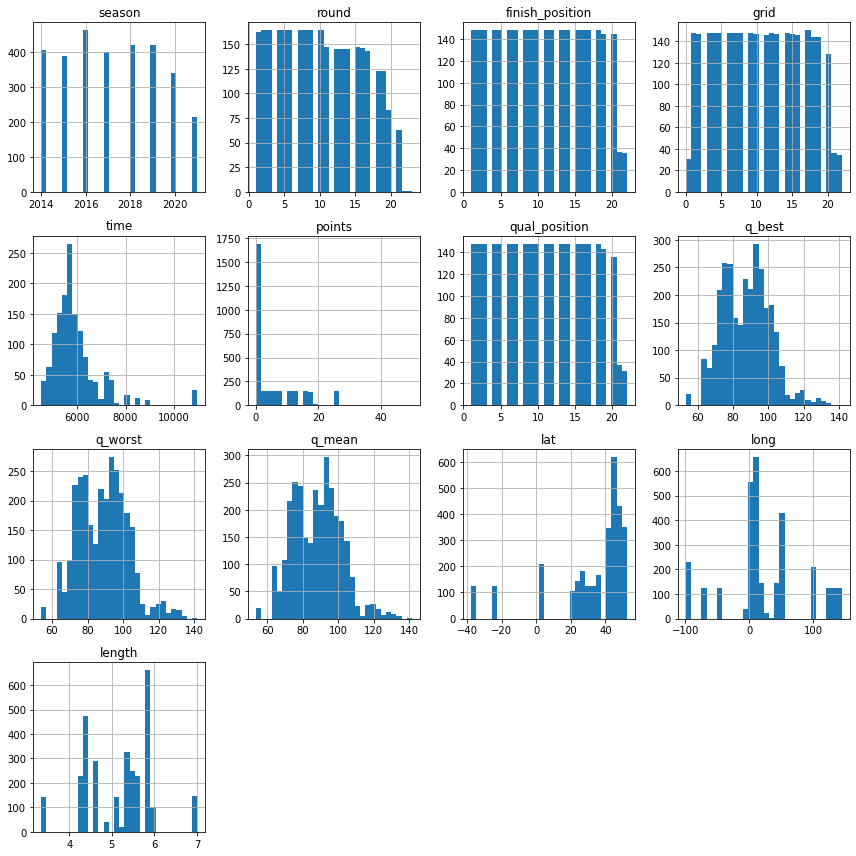

In [9]:
merged.hist(figsize=(12, 12), bins=30)
plt.tight_layout()
plt.show()

,season,round,race_name,circuitId,date,distance,weather,driverId,finish_position,constructor,...,code,dateOfBirth,circuitName,lat,long,locality,country,type,direction,length
0,2014,1,australian,albert_park,2014-03-16,302.271,"overcast, 19°c (66°f) dry",rosberg,1.0,mercedes,...,ROS,1985-06-27,Albert Park Grand Prix Circuit,-37.8497,144.96800,Melbourne,Australia,Street circuit,Clockwise,5.303
1,2015,1,australian,albert_park,2015-03-15,307.574,partly cloudy 17.5°c (63.5°f) air temperature...,rosberg,2.0,mercedes,...,ROS,1985-06-27,Albert Park Grand Prix Circuit,-37.8497,144.96800,Melbourne,Australia,Street circuit,Clockwise,5.303
2,2016,1,australian,albert_park,2016-03-20,302.271,partly cloudy 22.5°c (72.5°f) air temperature...,rosberg,1.0,mercedes,...,ROS,1985-06-27,Albert Park Grand Prix Circuit,-37.8497,144.96800,Melbourne,Australia,Street circuit,Clockwise,5.303
3,2014,1,australian,albert_park,2014-03-16,302.271,"overcast, 19°c (66°f) dry",kevin_magnussen,2.0,mclaren,...,MAG,1992-10-05,Albert Park Grand Prix Circuit,-37.8497,144.96800,Melbourne,Australia,Street circuit,Clockwise,5.303
4,2015,1,australian,albert_park,2015-03-15,307.574,partly cloudy 17.5°c (63.5°f) air temperature...,kevin_magnussen,17.0,mclaren,...,MAG,1992-10-05,Albert Park Grand Prix Circuit,-37.8497,144.96800,Melbourne,Australia,Street circuit,Clockwise,5.303
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3045,2020,14,turkish,istanbul,2020-11-15,309.396,overcast. wet and drying track. air 12.5°c (...,russell,16.0,williams,...,RUS,1998-02-15,Istanbul Park,40.9517,29.40500,Istanbul,Turkey,Race circuit,Anti-clockwise,5.338
3046,2020,14,turkish,istanbul,2020-11-15,309.396,overcast. wet and drying track. air 12.5°c (...,latifi,19.0,williams,...,LAT,1995-06-29,Istanbul Park,40.9517,29.40500,Istanbul,Turkey,Race circuit,Anti-clockwise,5.338
3047,2021,16,turkish,istanbul,2021-10-03,NaN,,NaN,NaN,NaN,...,NaN,NaN,Istanbul Park,40.9517,29.40500,Istanbul,Turkey,Race circuit,Anti-clockwise,5.338
3048,2021,13,dutch,zandvoort,2021-09-05,NaN,,NaN,NaN,NaN,...,NaN,NaN,Circuit Park Zandvoort,52.3888,4.54092,Zandvoort,Netherlands,Race circuit,Clockwise,4.259


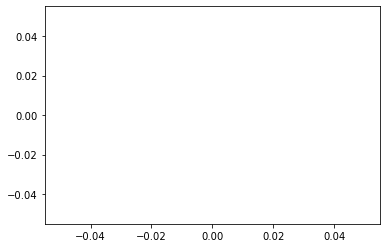

In [10]:
plt.plot()
merged

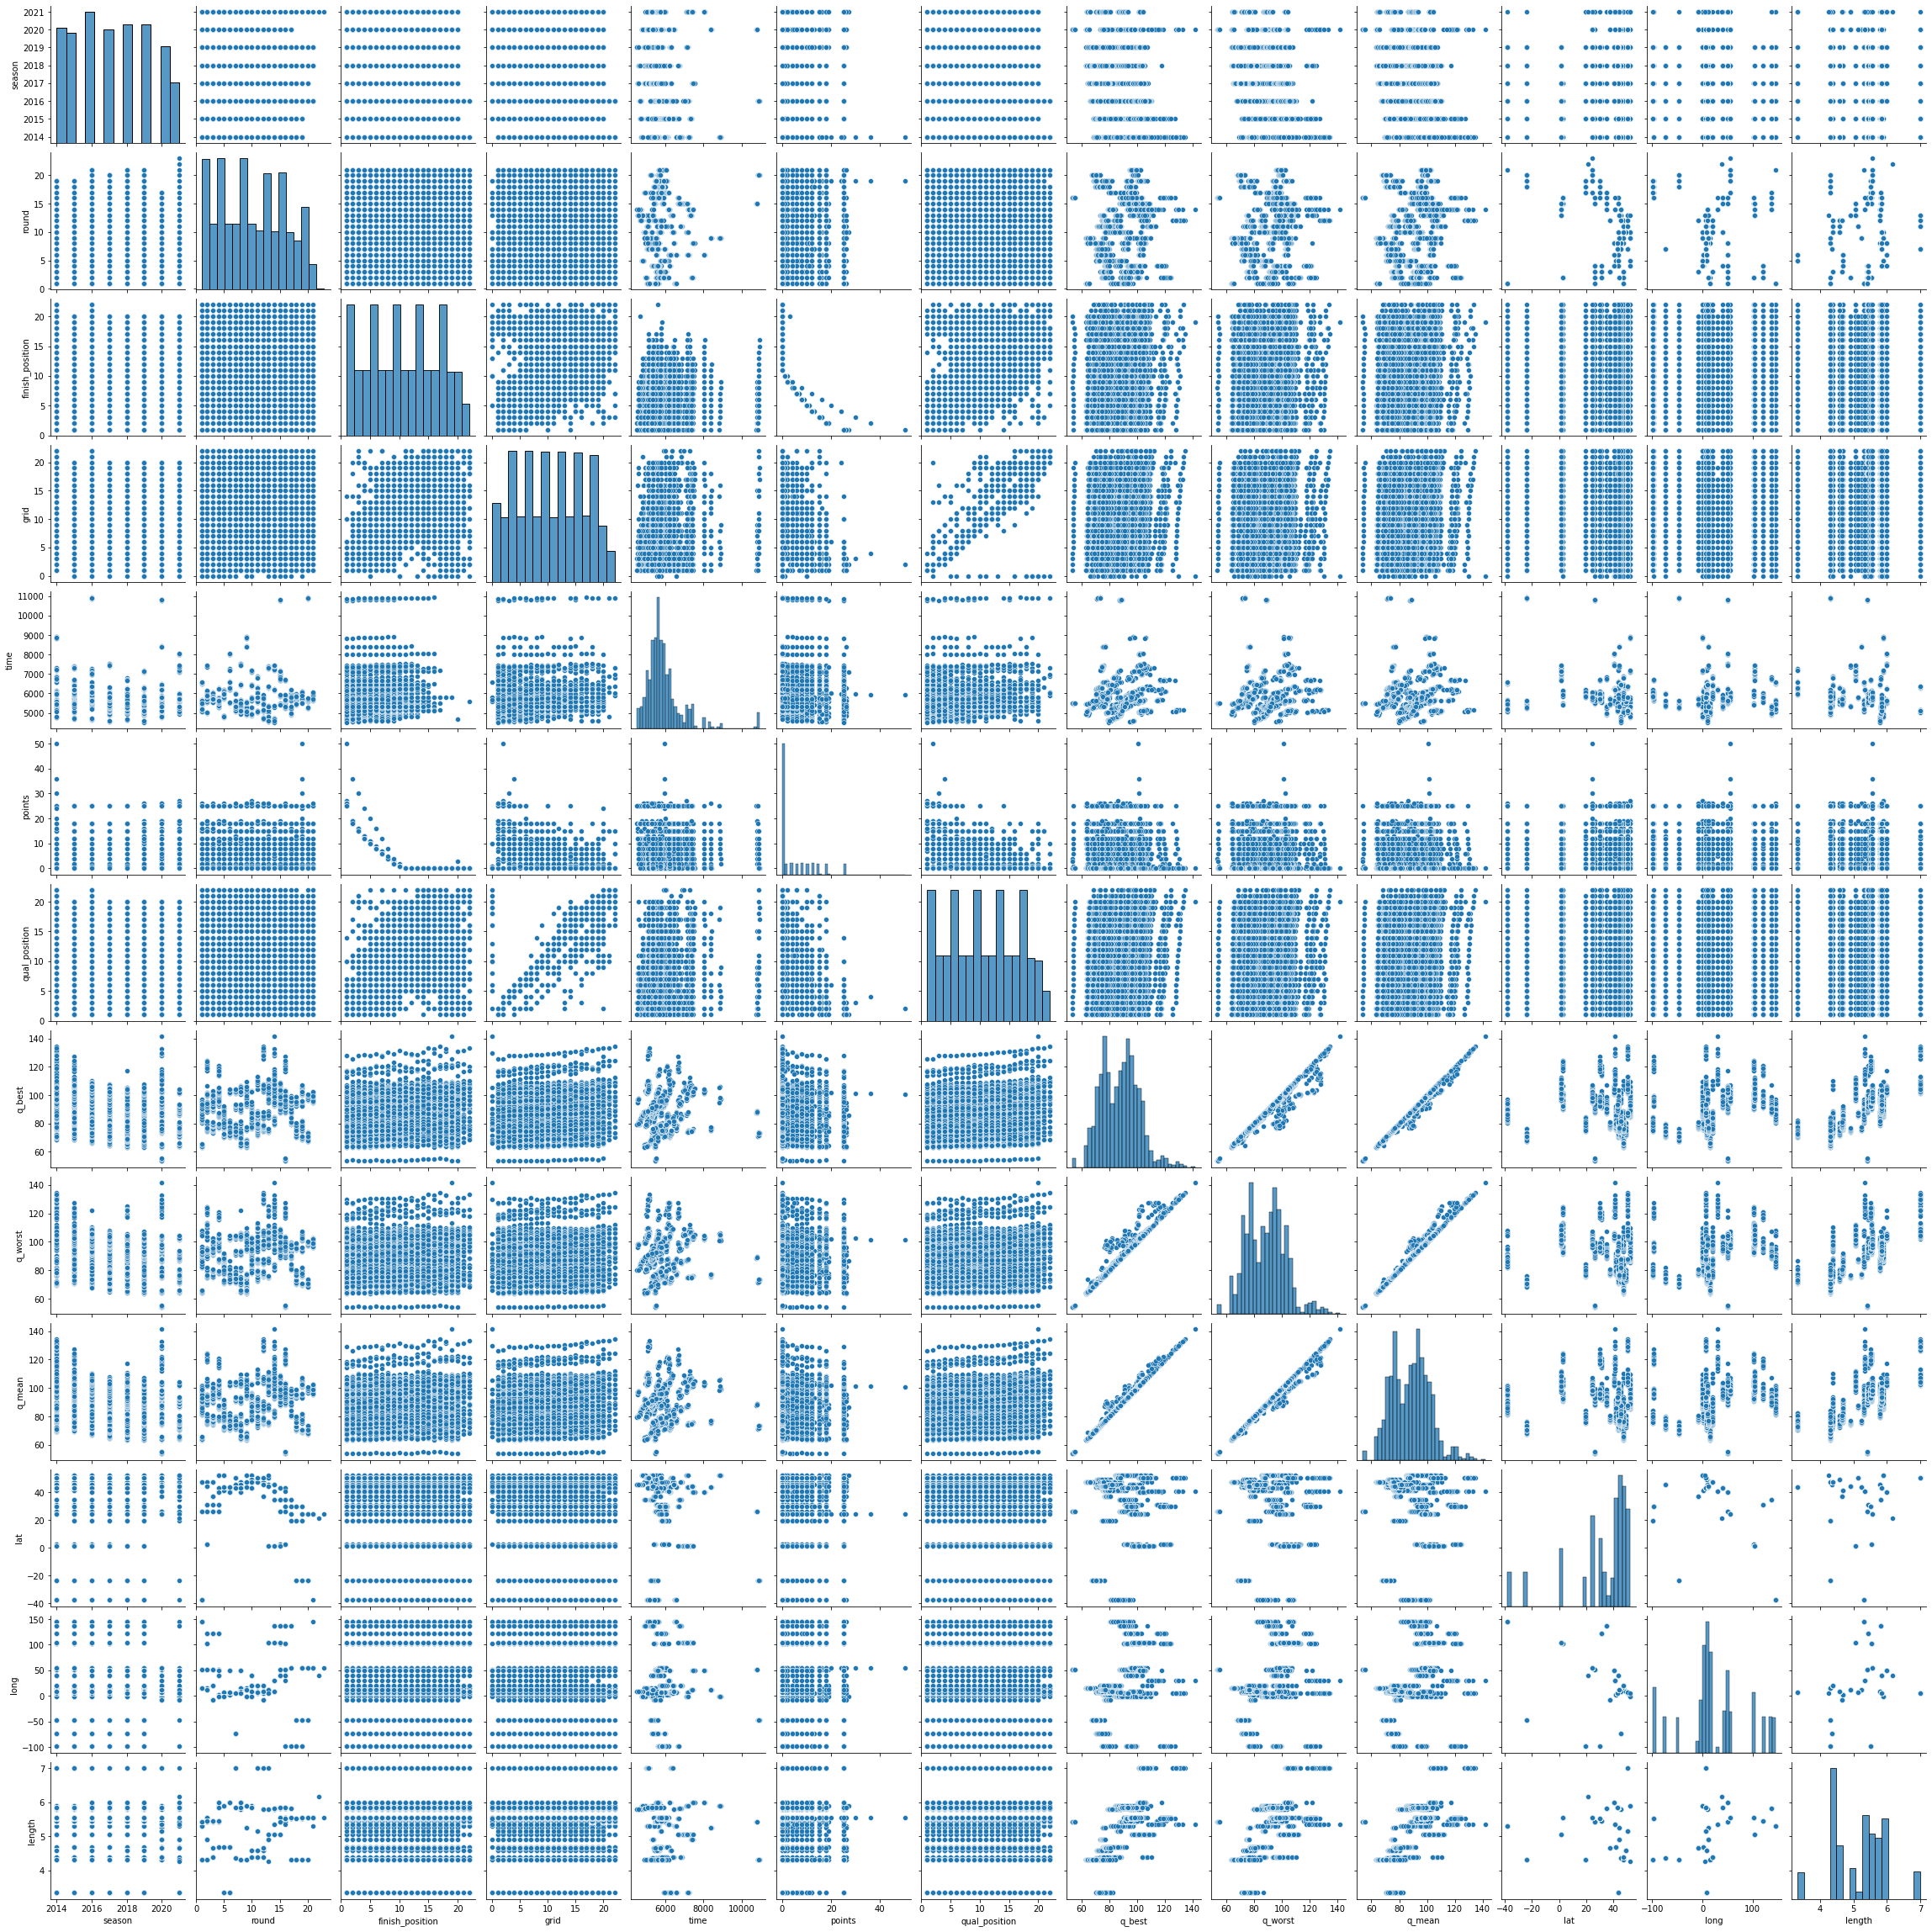

In [11]:
sns.pairplot(merged)

<!-- # q_mean, time
# q_best, time
# q_worst, time
# grid, qual_position
# finish_position, qual_position
# finish_position, grid_position -->

<!-- # standard = StandardScaler() -->

<!-- # std = standard.fit_transform(merged[['q_mean']]) -->

<!-- # std -->

<!-- # merged.time -->

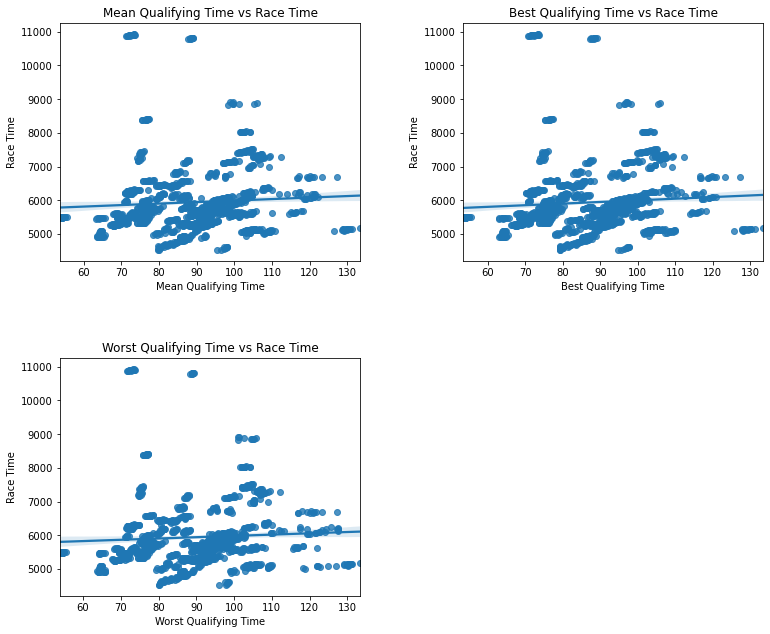

In [12]:
fig, ax = plt.subplots(ncols=2, nrows=2, figsize=(12, 10))

sns.regplot(data=merged, x='q_mean', y='time', ax=ax[0][0])
ax[0][0].set_title('Mean Qualifying Time vs Race Time')
ax[0][0].set_ylabel('Race Time')
ax[0][0].set_xlabel('Mean Qualifying Time')

sns.regplot(data=merged, x='q_best', y='time', ax=ax[0][1])
ax[0][1].set_title('Best Qualifying Time vs Race Time')
ax[0][1].set_ylabel('Race Time')
ax[0][1].set_xlabel('Best Qualifying Time')

sns.regplot(data=merged, x='q_worst', y='time', ax=ax[1][0])
ax[1][0].set_title('Worst Qualifying Time vs Race Time')
ax[1][0].set_ylabel('Race Time')
ax[1][0].set_xlabel('Worst Qualifying Time')

fig.tight_layout(pad=5)

fig.delaxes(ax[1][1])

<AxesSubplot:>

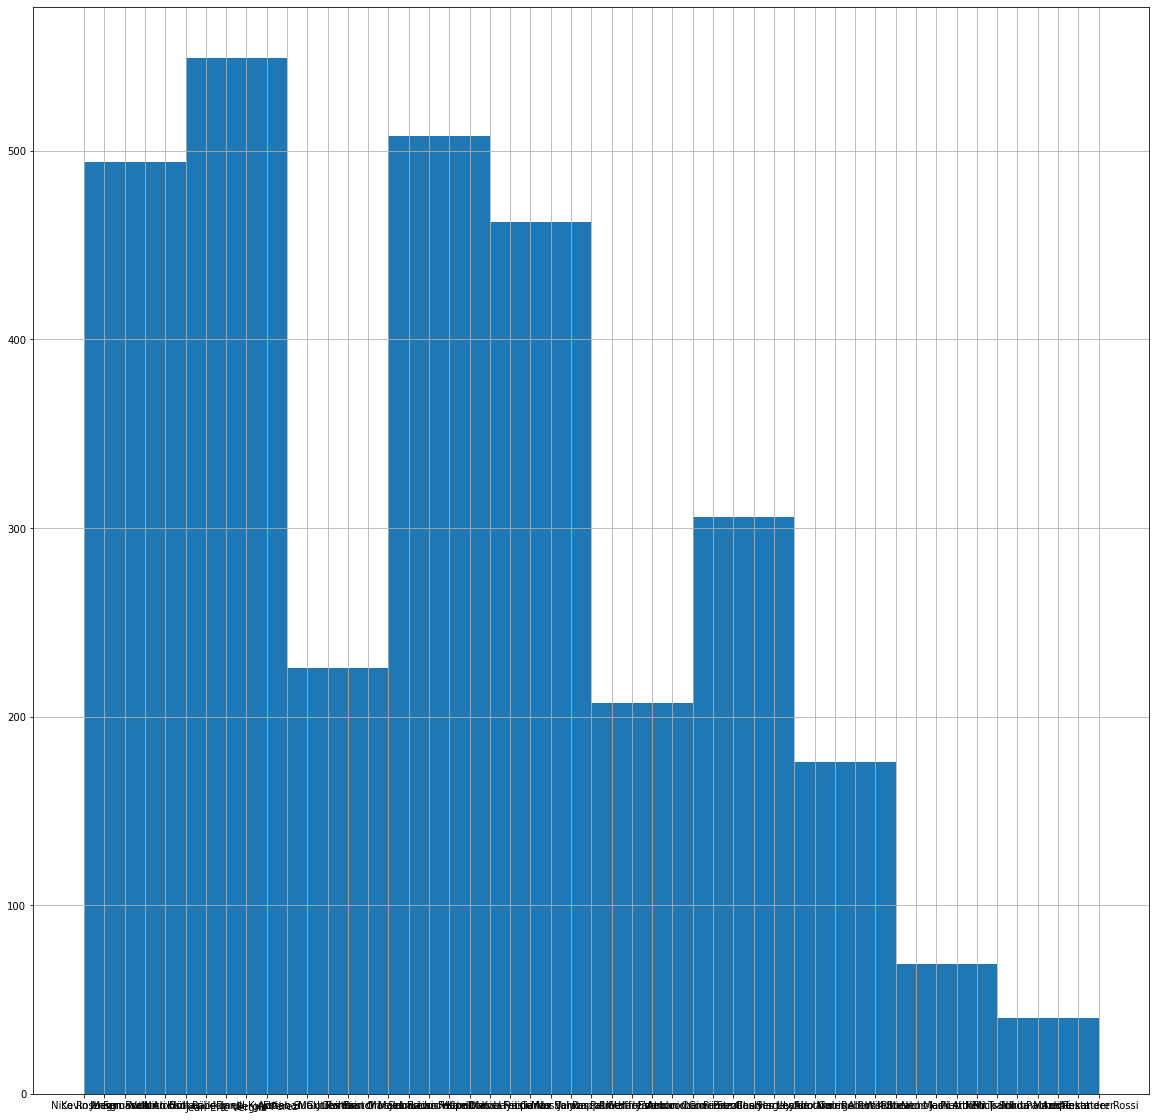

In [13]:
plt.subplots(figsize=(20, 20))
merged.name.hist()

In [14]:
main_df.corr()

,season,round,grid,qual_position,q_best,q_worst,q_mean,length,finish_position,points,filled_splits
season,1.000000,-0.093763,-0.046128,-0.032459,-0.297685,-0.299878,-0.300683,-0.010145,-0.035591,0.009579,-0.144613
round,-0.093763,1.000000,0.003821,-0.004088,0.085867,0.075962,0.081143,0.106067,-0.000079,0.004184,0.022045
grid,-0.046128,0.003821,1.000000,0.944435,0.100716,0.051744,0.078991,0.006635,0.604930,-0.652711,0.489334
qual_position,-0.032459,-0.004088,0.944435,1.000000,0.105150,0.052955,0.081822,-0.001313,0.631737,-0.674543,0.515416
q_best,-0.297685,0.085867,0.100716,0.105150,1.000000,0.981620,0.995893,0.714975,0.071042,-0.060046,0.214321
q_worst,-0.299878,0.075962,0.051744,0.052955,0.981620,1.000000,0.994457,0.699101,0.037473,-0.026920,0.189429
q_mean,-0.300683,0.081143,0.078991,0.081822,0.995893,0.994457,1.000000,0.709807,0.056220,-0.045139,0.203548
length,-0.010145,0.106067,0.006635,-0.001313,0.714975,0.699101,0.709807,1.000000,-0.002287,0.004134,0.108153
finish_position,-0.035591,-0.000079,0.604930,0.631737,0.071042,0.037473,0.056220,-0.002287,1.000000,-0.840664,0.561781
points,0.009579,0.004184,-0.652711,-0.674543,-0.060046,-0.026920,-0.045139,0.004134,-0.840664,1.000000,-0.593742


<!-- # sns.kdeplot(x=merged.ageDuringRace, y=merged.points)
# plt.show() -->

<!-- # plt.subplots(figsize=(20, 20))
# plt.hist(x=age_points.ageDuringRace, y=age_points.points, bins=50, binwidth=1)
# plt.show() -->

## Tableau EDA Charts

### Age

Age is a defining factor for many decisions made by teams. Younger drivers can be sharp and skillful, but also reckless and emotional. There comes a time where the benefits of youth and experience reach an equilibrium - the drivers’ youthful reactions are met by reliability and maturity. Here, drivers are at their most likely to win races, and are also most likely to appear attractive prospects to teams that are looking for their next big investment in a driver. If one of the top-tier teams was looking for their next driver to help contend for a world championship, one with plenty of years ahead, youthful skills but also the composure to guarantee consistency would be the ideal candidate.
___

#### i. What is the Volume of Point Scorers by Age since 2014

The diagram above shows the peak to be at the age of 25, with a strong right skew and several stages to the decline.

The reasoning for such a strong right skew is two-fold. Firstly, we have decisions made by constructors. Most years you can expect to see at least one or two of the new wave of up-and-coming drivers from Formula 2 come onto the scene in Formula 1. These drivers are always young and replacing someone who has not been performing and/or making a difference for their team. Because of this, the turnover of young drivers is very high and there is a sort of cut-off age past which only the drivers that have proven to have the necessary mettle and an element of luck are able to remain in the sport. It is for this reason that there are so many drivers of a young age competing in the sport, and of those who are able to cement their position in the sport there is then the everlasting pressure of the tradeoff between performance for their team and the viability of investing in the driver for the future of their team. Therefore as time moves on, the older drivers will eventually be dropped from the best teams to lower-tier teams where their experience will still provide some benefit, and then altogether from Formula 1, unless those drivers are particularly rare drivers that are able to continue to score points well into their late 30s and early 40s (e.g. Kimi Räikkönen, Fernando Alonso etc.)

![age-point-frequency](ignore/Tableau_Charts/age_point_frequency.png)

___

#### ii. Average number of Point-Scoring Positions achieved by Age

In the diagram above, we see the opposite side of the coin. The diagram shows the average number of point scoring positions by age of a driver. We know that there is a high volume of young drivers which begins to decline at the age of 27, and with so many unsuccessful drivers being eliminated from teams prior to this age it is understandable that the average number of positions in the points for these ages will be substantially lower. Once we reach the ages of 27+, the average climbs rapidly, since the volume of drivers that make it in Formula 1 through this stage have established themselves in a good team due to strong performance and consistency. From around the 33-year-old mark things are unsurprisingly beginning to fall away as teams would begin to younger drivers as they look towards the future of the teams and drivers are beginning to lose their edge. There are, however, some exceptions - for example the sky-high average point-scoring finishes for 38-year-old drivers was achieved completely in one year by Kimi Räikkönen, who had such a huge effect due to a season of incredible performance and so few other 38-year-old drivers.

![age-point-average](ignore/Tableau_Charts/age_point_average.png)

___

### C. Mistakes
What makes Formula 1 so unpredictable is the inability to predict a drivers’ or constructors’ race-ending event. For example, an illness, a crash, an engine fault, a brake fault or simply a problem in the pit lane that means a car goes into the pits leading the race convincingly, and then never leaves the pits due to a problem with pit machinery forcing the car to retire. This happens very often in Formula 1, with at least one DNF to be expected every race and sometimes up to 7 or more in one race!

It is important to look at driver and constructor consistency to understand why things might have unfolded as they have in the respective championships.

#### i. Average Number of Mistakes by Drivers with 20+ Races



![driver-faults](ignore/Tableau_Charts/driver_issues_20plus_races_avg_mistakes.png)

Unsurprisingly, at the very top we can see 7-time world champion Lewis Hamilton, well renowned for his risk-conscious driving style, minimising the potential for any endangerment of his position or potential win. This, combined with his overall control of the car, enabled him to ensure he didn’t lose a race in the wet, which is classically characterised as unpredictable personified, for 5 years.

Looking further below Lewis Hamilton, we see multiple other world champions and title contenders, including Nico Rosberg, Valtteri Bottas, Sebastian Vettel, Daniel Ricciardo and Kimi Räikkönen.

At the bottom we can see many of the names now committed to Formula 1 history, including Pastor Maldonado, Esteban Gutierrez, Pascal Wehrlein, Jolyon Palmer and Marcus Ericsson.

Interestingly, there are some names here that are displaced according to this rule. Max Verstappen, the star driver of the Red Bull Racing team and 3rd place finisher after the two dominant Mercedes drivers for the past 2 seasons, shows a comparatively high number of mistakes sitting about ⅔ down in the table. This can be explained by his junior years in F1 from 2015 onwards, where he raced for Renault and then moved to Red Bull in 2016. As discussed previously, it is expected for drivers to make more mistakes during the early days of their career whilst they learn to control temper, manage pressure and become more vigilant in scenarios that could potentially pose damage to their car.

The other, Jenson Button, is highly intriguing since during the time reviewed he will have been in the latter days of his F1 career, following his world championship title in 2009.
Combining deeper investigation with prior knowledge on the progression of Jenson Button’s road to retirement, I would surmise that due to repeated years of uncompetitive machinery and misfortune following 2009 and his decline in motivation to compete in Formula 1 led to more personal mistakes when behind the wheel.

#### ii. Average Number of Mistakes by Constructors since 2014

![constructor-faults](ignore/Tableau_Charts/constructor_issues_faults.png)

Looking at Constructors’  mistakes, we see the two most successful F1 teams of all time right at the top with the lowest percentage of mistakes vs. races entered. The combined consistency of Mercedes and their drivers Lewis Hamilton, Nico Rosberg and Valtteri Bottas is apparent, and it comes as no surprise that the top 2 spots in the Drivers’ Championships over 5 of the last 7 seasons (2014 - 2020) have been occupied by whichever of these three drivers have been racing Mercedes’ equipment.

Red Bull and Alpha Tauri positioned next to each other, understandably since they are essentially Red Bull’s 1st and 2nd team and therefore use much of the same starting kit inside the cars meaning base reliability should be very similar between these two before separate development begins.

McLaren had many issues in the years following the 2014 season, with 9th place finishes in 2015 and 2017 before incrementally returning to form reminiscent of their former glory, culminating in a third place finish in 2020.

Renault, after taking control of the Lotus F1 team in 2016, had some poor performance in the early days of their hybrid era appearances with a 9th place finish in 2016 while getting their cars and team up-to-speed. Lotus, having performed well between 2012 and 2013, lost both their CEO and their Team Principal (who joined McLaren instead) in 2014, gaining a new Team Principal with no prior Formula 1 experience. Finishing 8th overall in the standings in 2014 and facing problem after problem for both drivers in 2015, Renault had a lot of work to do to recover some of the team’s performance from 2016, and have been improving since.

Right at the bottom we have Caterham, dubbed one of the worst Formula 1 teams of all time, plagued by failure throughout its 2012-2014 lifespan before closing down permanently at the end of 2014 having never scored a point.

### Race Venue Distribution

![race-venue-distribution](ignore/Tableau_Charts/race_venue_distribution.png)